<a href="https://colab.research.google.com/github/myhappydays/Programmers-Data-Analysis-2nd/blob/main/CreditCard_CustomerUsed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
bank = pd.read_csv('/content/drive/MyDrive/2ndProject/Preprocessed_BankChurners.csv')
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                10127 non-null  int64  
 1   CLIENTNUM                 10127 non-null  int64  
 2   Attrition_Flag            10127 non-null  int64  
 3   Customer_Age              10127 non-null  int64  
 4   Gender                    10127 non-null  int64  
 5   Dependent_count           10127 non-null  int64  
 6   Education_Level           10127 non-null  int64  
 7   Marital_Status            10127 non-null  int64  
 8   Income_Category           10127 non-null  int64  
 9   Card_Category             10127 non-null  int64  
 10  Months_on_book            10127 non-null  int64  
 11  Total_Relationship_Count  10127 non-null  int64  
 12  Months_Inactive_12_mon    10127 non-null  int64  
 13  Contacts_Count_12_mon     10127 non-null  int64  
 14  Credit

## 최종 가설
고객 사용 내역 기반 분석
attrition_flag와 함께 보기

1. Total_Trans_Ct / Total_Trans_Amt

2. Total_Ct_Chng_Q4_Q1

3. Total_Revolving_Bal

4. Total_Relationship_Count

5. Avg_Utilization_Ratio

### Total_Trans_Ct / Total_Trans_Amt (총 거래 건수)

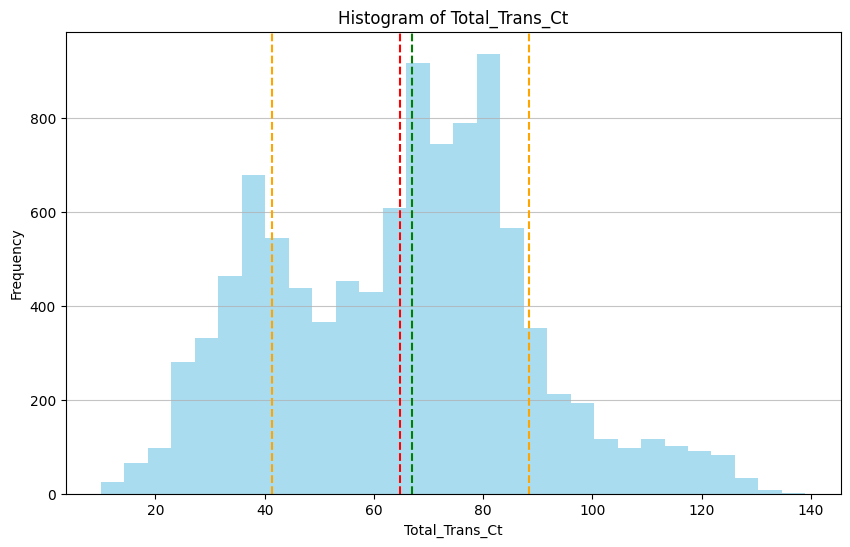

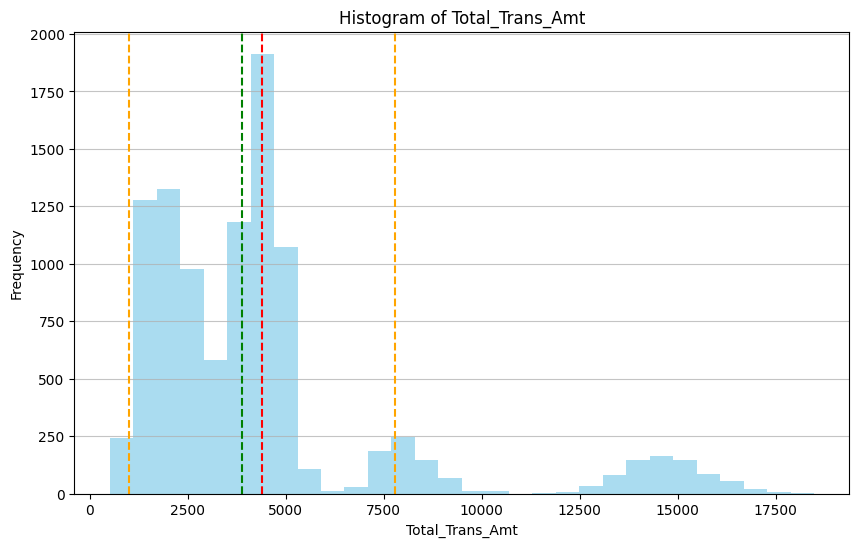

In [10]:
total_columns = ['Total_Trans_Ct', 'Total_Trans_Amt']
total_data = bank[total_columns]

for column in total_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(bank[column], color='skyblue', bins=30, alpha=0.7)

    plt.axvline(bank[column].mean(), color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {bank[column].mean():.2f}')
    plt.axvline(bank[column].median(), color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {bank[column].median():.2f}')
    plt.axvline(bank[column].mean() + bank[column].std(), color='orange', linestyle='dashed', linewidth=1.5, label=f'Std Dev: {bank[column].mean() + bank[column].std():.2f}')
    plt.axvline(bank[column].mean() - bank[column].std(), color='orange', linestyle='dashed', linewidth=1.5)

    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()


거래 건수와 거래량을 범주로 나누어서 이탈률을 체크한다.

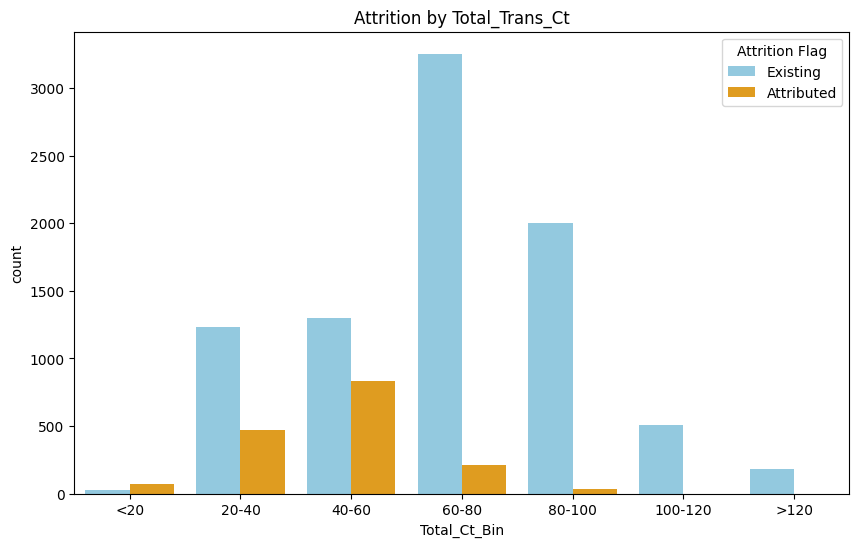

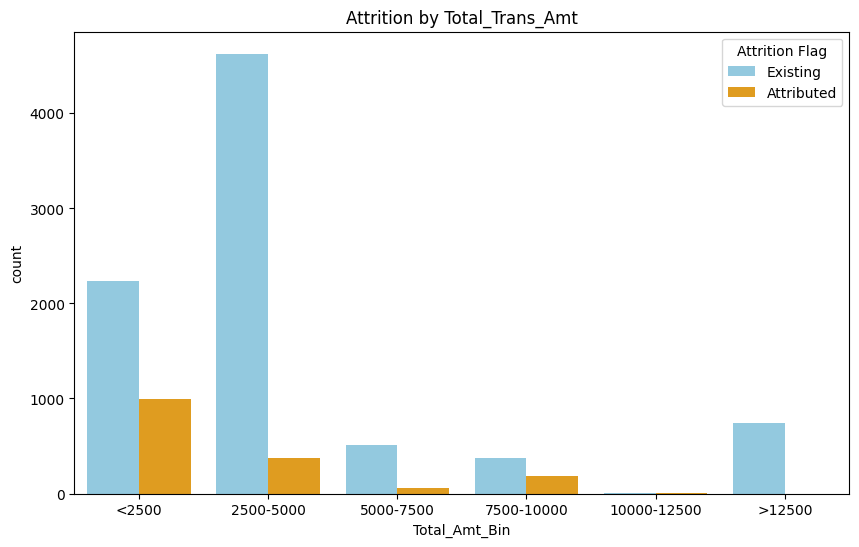

In [26]:
# 거래건수
ct_bin = [-np.inf, 20, 40, 60, 80, 100, 120, np.inf]
ct_label = ['<20', '20-40', '40-60', '60-80', '80-100', '100-120', '>120']
bank['Total_Ct_Bin'] = pd.cut(bank['Total_Trans_Ct'], bins=ct_bin, labels=ct_label, right=False)

plt.figure(figsize=(10, 6))
ct_plot = sns.countplot(data=bank, x='Total_Ct_Bin', hue='Attrition_Flag', palette={0:'skyblue', 1:'orange'})
ct_plot.set_title('Attrition by Total_Trans_Ct')
plt.legend(title='Attrition Flag', labels=['Existing', 'Attributed'])
plt.show()

# 거래량
amt_bin = [-np.inf, 2500, 5000, 7500, 10000, 12500, np.inf]
amt_label = ['<2500', '2500-5000', '5000-7500', '7500-10000', '10000-12500', '>12500']
bank['Total_Amt_Bin'] = pd.cut(bank['Total_Trans_Amt'], bins=amt_bin, labels=amt_label, right=False)


plt.figure(figsize=(10, 6))
ct_plot = sns.countplot(data=bank, x='Total_Amt_Bin', hue='Attrition_Flag', palette={0:'skyblue', 1:'orange'})
ct_plot.set_title('Attrition by Total_Trans_Amt')
plt.legend(title='Attrition Flag', labels=['Existing', 'Attributed'])
plt.show()

약간 오반가? k-means로 체크해서 마케팅 방안 세우기 좋을 거 같기도 한데

In [27]:
from sklearn.preprocessing import StandardScaler

data_for_clustering = bank[['Total_Trans_Ct', 'Total_Trans_Amt']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

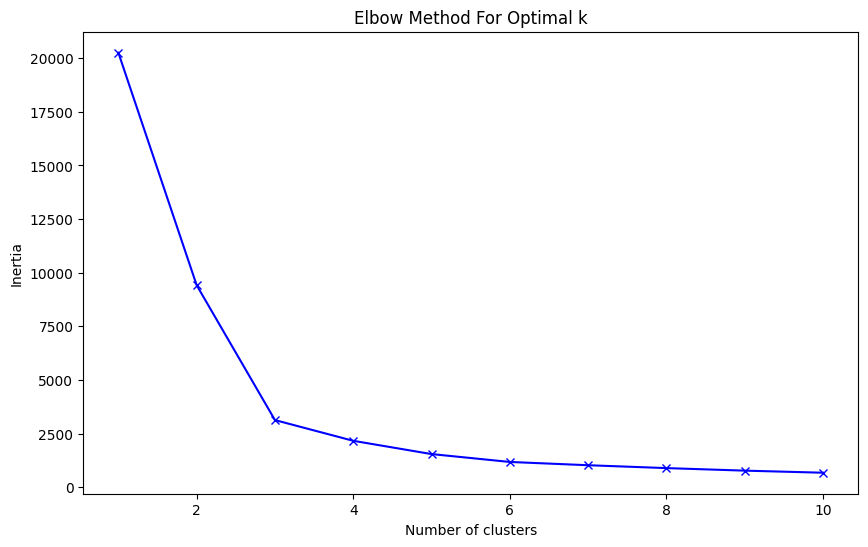

In [28]:
from sklearn.cluster import KMeans

# 엘보우 방법을 사용하여 최적의 클러스터 수 찾기
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data_scaled)
    inertia.append(kmeans.inertia_)

# 엘보우 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [29]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
bank['Cluster'] = kmeans.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


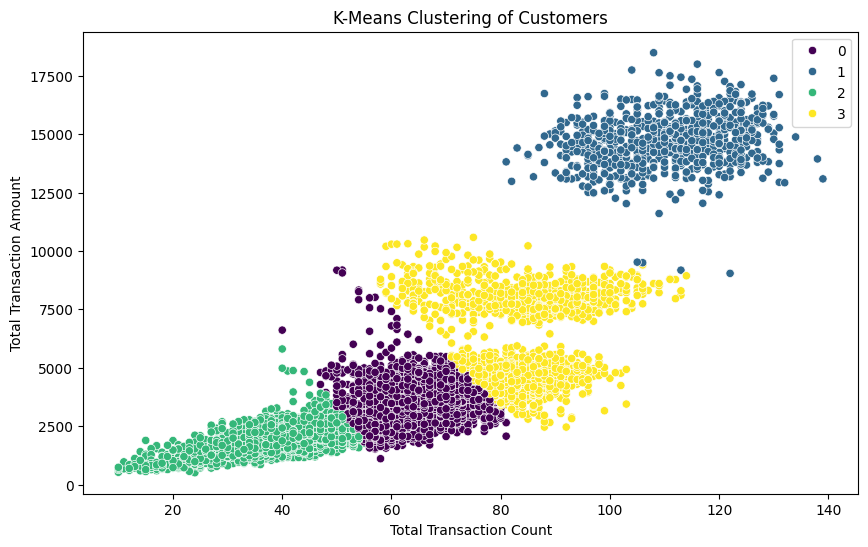

In [31]:
# 클러스터 결과 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Trans_Ct', y='Total_Trans_Amt', hue='Cluster', data=bank, palette='viridis')
plt.title('K-Means Clustering of Customers')
plt.xlabel('Total Transaction Count')
plt.ylabel('Total Transaction Amount')
plt.legend()
plt.show()

- 초록색 그룹
  - 거래 건수 少 거래 금액 少
  - 이탈(위험)고객

- 보라색 그룹
  - 거래 건수 多 거래 금액 少
  - 안정고객1

- 노란색 그룹
  - 거래 건수 少 거래 금액 多
  - 안정고객 2

- 파란색 그룹
  - 거래 건수 多 거래 금액 多
  - 충성고객

<ipython-input-41-25818af6d06a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_dist, x='Cluster', y='Count', palette=['purple', 'blue', 'green', 'yellow'])


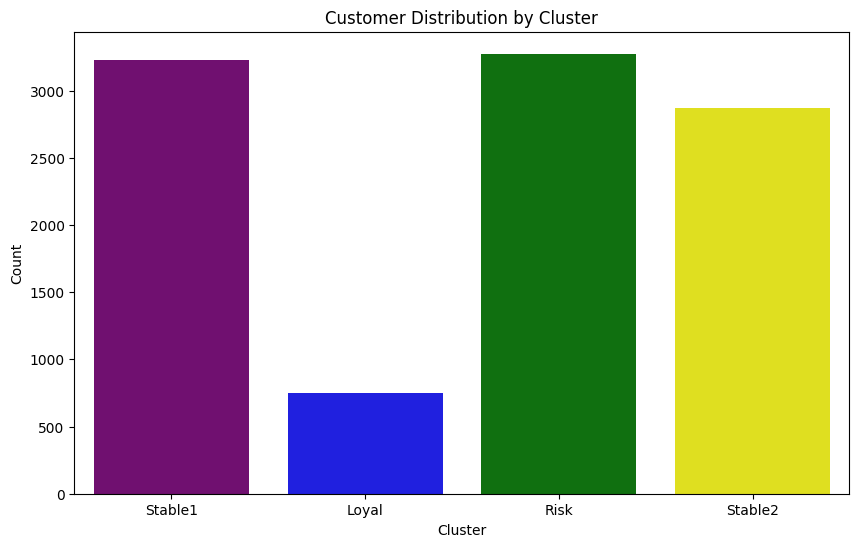

In [41]:
# 클러스터별 고객 분포
cluster_dist = bank['Cluster'].value_counts().reset_index()
cluster_dist.columns=['Cluster', 'Count']

plt.figure(figsize=(10,6))
sns.barplot(data=cluster_dist, x='Cluster', y='Count', palette=['purple', 'blue', 'green', 'yellow'])
plt.title('Customer Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Stable1', 'Loyal', 'Risk', 'Stable2'])
plt.show()

대충 계산기 때려봤을 때 충성고객이 10% 미만 -> 충성고객 늘리고 이탈 막아야 할 듯

### Total_Ct/Amt_Chng_Q4_Q1 (4분기 대 1분기의 건수/거래량)

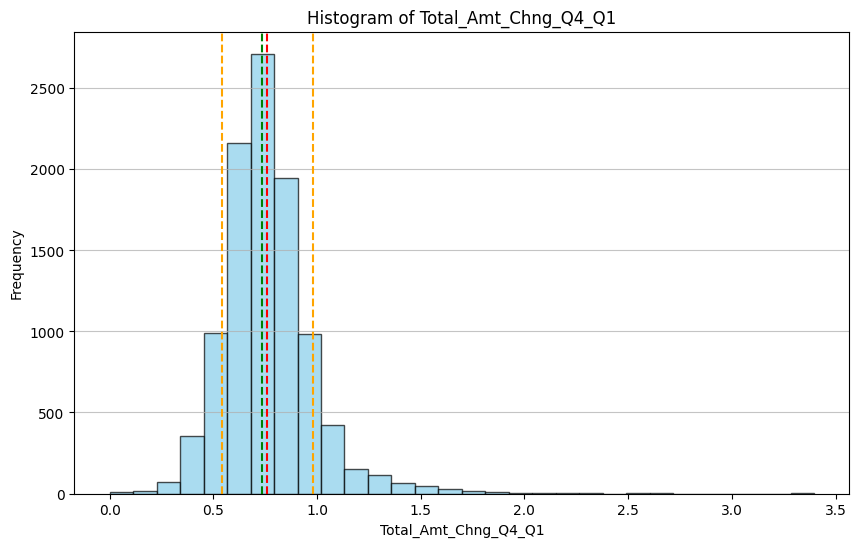

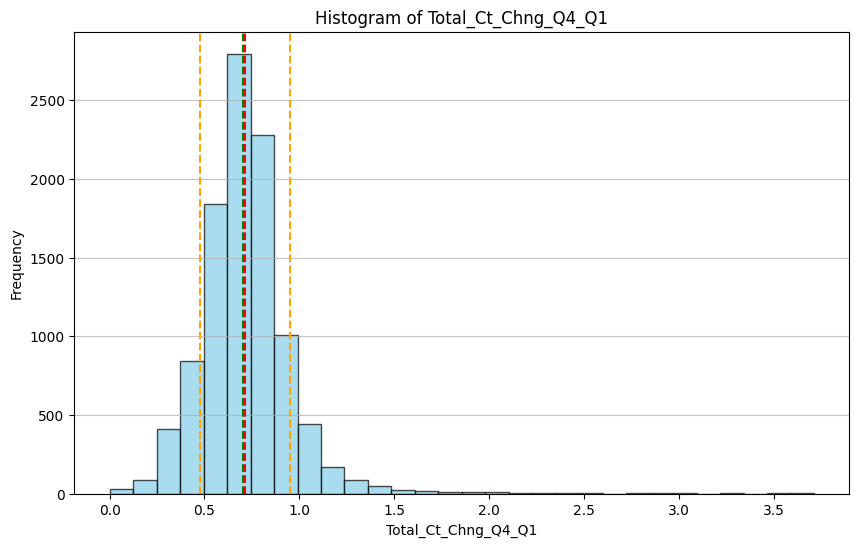

In [8]:
q4_q1_columns = [col for col in bank.columns if 'Q4_Q1' in col]
q4_q1_data = bank[q4_q1_columns]

for column in q4_q1_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(bank[column], color='skyblue', bins=30, edgecolor='k', alpha=0.7)

    plt.axvline(bank[column].mean(), color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {bank[column].mean():.2f}')
    plt.axvline(bank[column].median(), color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {bank[column].median():.2f}')
    plt.axvline(bank[column].mean() + bank[column].std(), color='orange', linestyle='dashed', linewidth=1.5, label=f'Std Dev: {bank[column].mean() + bank[column].std():.2f}')
    plt.axvline(bank[column].mean() - bank[column].std(), color='orange', linestyle='dashed', linewidth=1.5)

    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()


건수와 거래량의 비율을 범주로 나누어서 이탈률을 체크한다

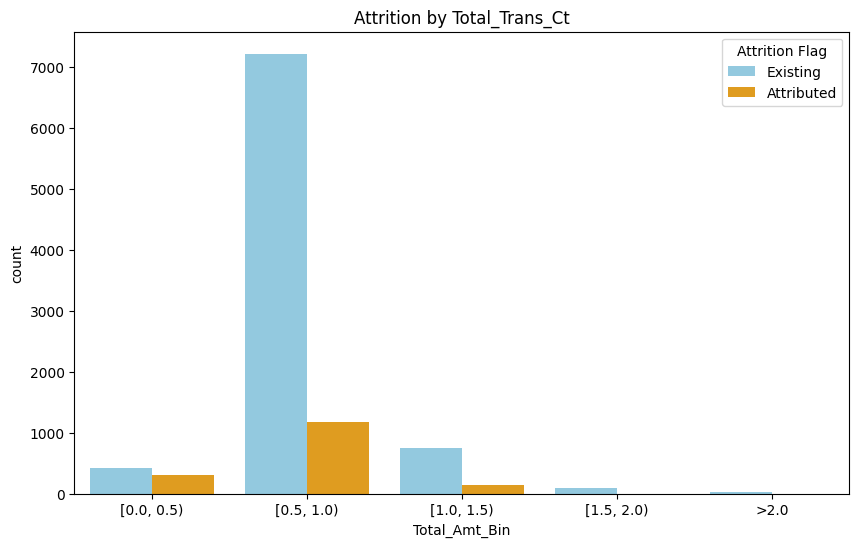

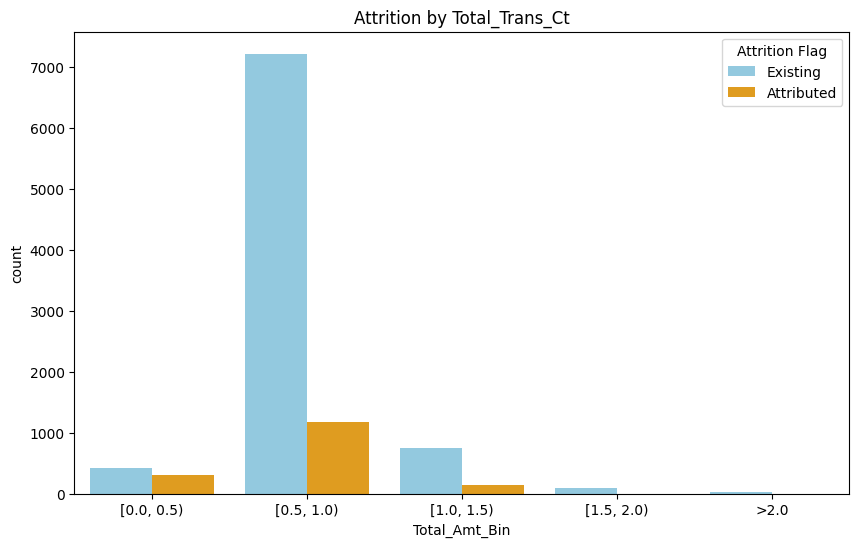

In [42]:
# 4분기 대 1분기 건수 -> 둘이 모양이 비슷해서 그냥 하나루 할거임
bin = [0, 0.5, 1.0, 1.5, 2.0, np.inf]
label = ['[0.0, 0.5)', '[0.5, 1.0)', '[1.0, 1.5)', '[1.5, 2.0)', '>2.0']
bank['Total_Ct_Bin'] = pd.cut(bank['Total_Ct_Chng_Q4_Q1'], bins=bin, labels=label, right=False)
bank['Total_Amt_Bin'] = pd.cut(bank['Total_Amt_Chng_Q4_Q1'], bins=bin, labels=label, right=False)

plt.figure(figsize=(10, 6))
ct_plot = sns.countplot(data=bank, x='Total_Amt_Bin', hue='Attrition_Flag', palette={0:'skyblue', 1:'orange'})
ct_plot.set_title('Attrition by Total_Trans_Ct')
plt.legend(title='Attrition Flag', labels=['Existing', 'Attributed'])
plt.show()

plt.figure(figsize=(10, 6))
ct_plot = sns.countplot(data=bank, x='Total_Amt_Bin', hue='Attrition_Flag', palette={0:'skyblue', 1:'orange'})
ct_plot.set_title('Attrition by Total_Trans_Ct')
plt.legend(title='Attrition Flag', labels=['Existing', 'Attributed'])
plt.show()

애초에 히스토그램이 정규분포 모양이기도 했고, 이상치나 이탈률이 뚜렷하게 나타나는 구간을 보기는 힘들다. 더 분석하기에는 근거가 부족할 것 같다.

### Total_Revolving_Bal (총 리볼빙 잔액)

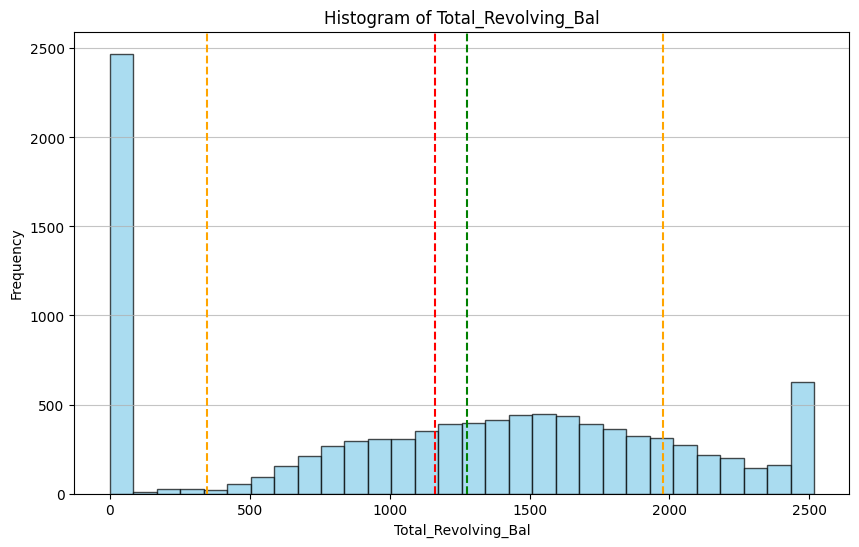

In [45]:
column = 'Total_Revolving_Bal'
plt.figure(figsize=(10, 6))
plt.hist(bank[column], color='skyblue', bins=30, edgecolor='k', alpha=0.7)
plt.axvline(bank[column].mean(), color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {bank[column].mean():.2f}')
plt.axvline(bank[column].median(), color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {bank[column].median():.2f}')
plt.axvline(bank[column].mean() + bank[column].std(), color='orange', linestyle='dashed', linewidth=1.5, label=f'Std Dev: {bank[column].mean() + bank[column].std():.2f}')
plt.axvline(bank[column].mean() - bank[column].std(), color='orange', linestyle='dashed', linewidth=1.5)
plt.title('Histogram of Total_Revolving_Bal')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

0 구간은 이탈 고객이 포함되어서 그런가 수치 차이가 크다. 500 전후의 이탈률을 계산해 보았다

<ipython-input-47-1d12b428d0d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask['Revolving_Bal_Bins'] = pd.cut(mask['Total_Revolving_Bal'], bins=range(0, 600, 100), right=False)


<Figure size 1000x600 with 0 Axes>

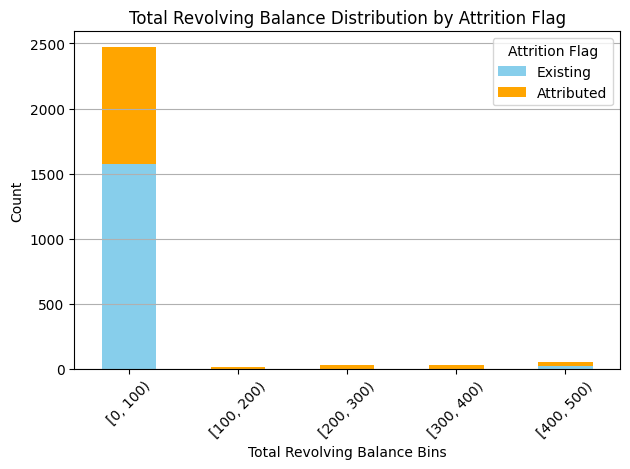

In [47]:
mask = bank[(bank['Total_Revolving_Bal'] >= 0) & (bank['Total_Revolving_Bal'] <= 500)]
mask['Revolving_Bal_Bins'] = pd.cut(mask['Total_Revolving_Bal'], bins=range(0, 600, 100), right=False)

plt.figure(figsize=(10, 6))
bar_plot = mask.groupby(['Revolving_Bal_Bins', 'Attrition_Flag']).size().unstack().plot(kind='bar', stacked=True, color=['skyblue', 'orange'])

plt.title('Total Revolving Balance Distribution by Attrition Flag')
plt.xlabel('Total Revolving Balance Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition Flag', labels=['Existing', 'Attributed'])
plt.grid(axis='y')

plt.tight_layout()
plt.show()

<ipython-input-48-a933667dcc0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask['Revolving_Bal_Bins'] = pd.cut(mask['Total_Revolving_Bal'], bins=range(500, 2700, 100), right=False)


<Figure size 1000x600 with 0 Axes>

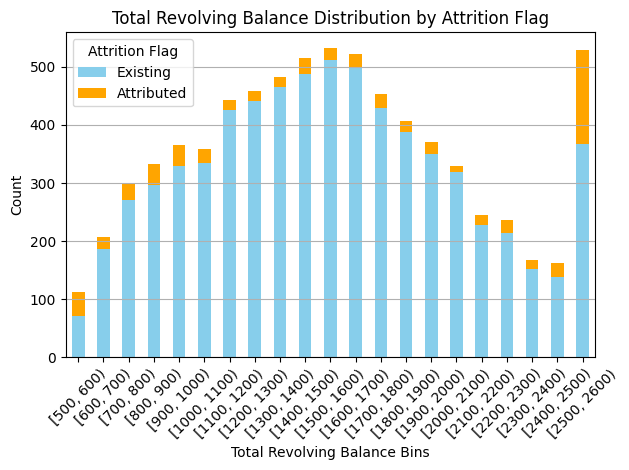

In [48]:
mask = bank[(bank['Total_Revolving_Bal'] >= 500) & (bank['Total_Revolving_Bal'] <= 2600)]
mask['Revolving_Bal_Bins'] = pd.cut(mask['Total_Revolving_Bal'], bins=range(500, 2700, 100), right=False)

plt.figure(figsize=(10, 6))
bar_plot = mask.groupby(['Revolving_Bal_Bins', 'Attrition_Flag']).size().unstack().plot(kind='bar', stacked=True, color=['skyblue', 'orange'])

plt.title('Total Revolving Balance Distribution by Attrition Flag')
plt.xlabel('Total Revolving Balance Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition Flag', labels=['Existing', 'Attributed'])
plt.grid(axis='y')

plt.tight_layout()
plt.show()

0-100, 500-600, 2500-2600 구간이 이상하게 높음 -> 몇 퍼센트인지 체크

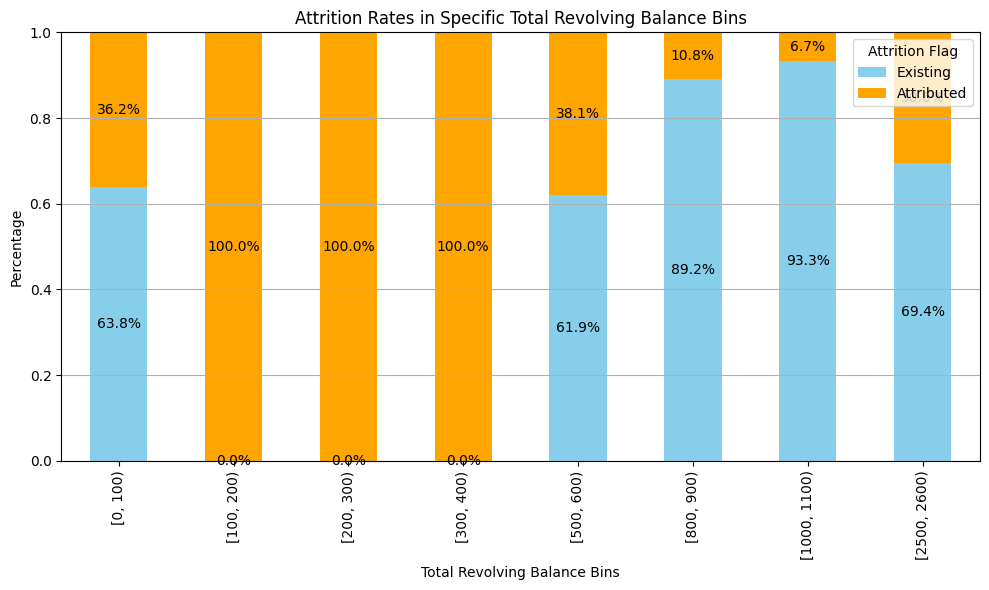

In [66]:
bin_range = [(0, 100), (100, 200), (200, 300), (300, 400), (500, 600), (800, 900), (1000, 1100), (2500, 2600)]
result = []

for bin in bin_range:
    mask = bank[(bank['Total_Revolving_Bal'] >= bin[0]) & (bank['Total_Revolving_Bal'] < bin[1])]
    total_count = len(mask)
    attrition_count = mask['Attrition_Flag'].value_counts()
    attrition_rate = attrition_count / total_count
    result.append(attrition_rate)

attrition_df = pd.DataFrame(result, index=['[0, 100)', '[100, 200)', '[200, 300)', '[300, 400)', '[500, 600)', '[800, 900)', '[1000, 1100)', '[2500, 2600)'])
attrition_df.columns = ['Existing', 'Attributed']

plt.figure(figsize=(10, 6))
ax = plt.gca()
attrition_df.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'orange'])

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    percentage = f'{height * 100:.1f}%'
    ax.text(x + width / 2, y + height / 2, percentage, ha='center', va='center')

plt.title('Attrition Rates in Specific Total Revolving Balance Bins')
plt.xlabel('Total Revolving Balance Bins')
plt.ylabel('Percentage')
plt.legend(title='Attrition Flag', labels=['Existing', 'Attributed'])
plt.ylim(0, 1)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

### Total_Relationship_Count (보유한 상품 수)

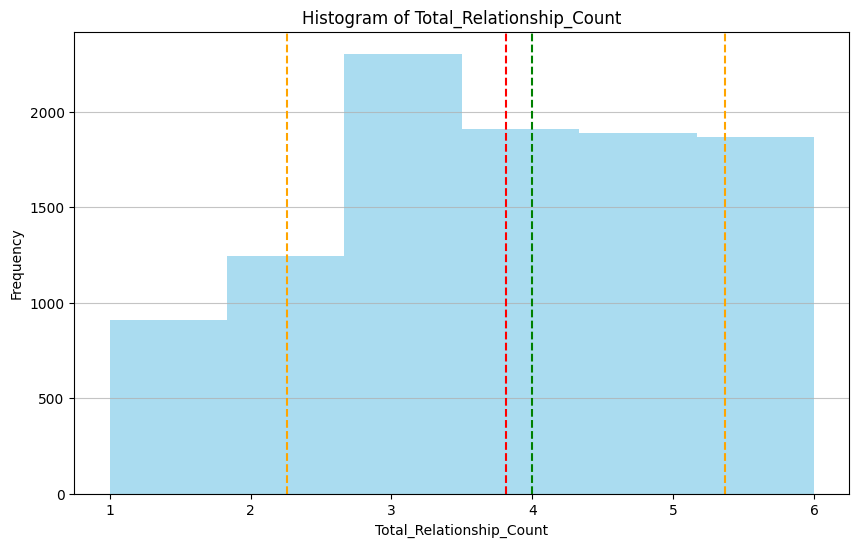

In [73]:
column = 'Total_Relationship_Count'
plt.figure(figsize=(10, 6))
plt.hist(bank[column], color='skyblue', bins=6, alpha=0.7)
plt.axvline(bank[column].mean(), color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {bank[column].mean():.2f}')
plt.axvline(bank[column].median(), color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {bank[column].median():.2f}')
plt.axvline(bank[column].mean() + bank[column].std(), color='orange', linestyle='dashed', linewidth=1.5, label=f'Std Dev: {bank[column].mean() + bank[column].std():.2f}')
plt.axvline(bank[column].mean() - bank[column].std(), color='orange', linestyle='dashed', linewidth=1.5)
plt.title('Histogram of Total_Relationship_Count')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

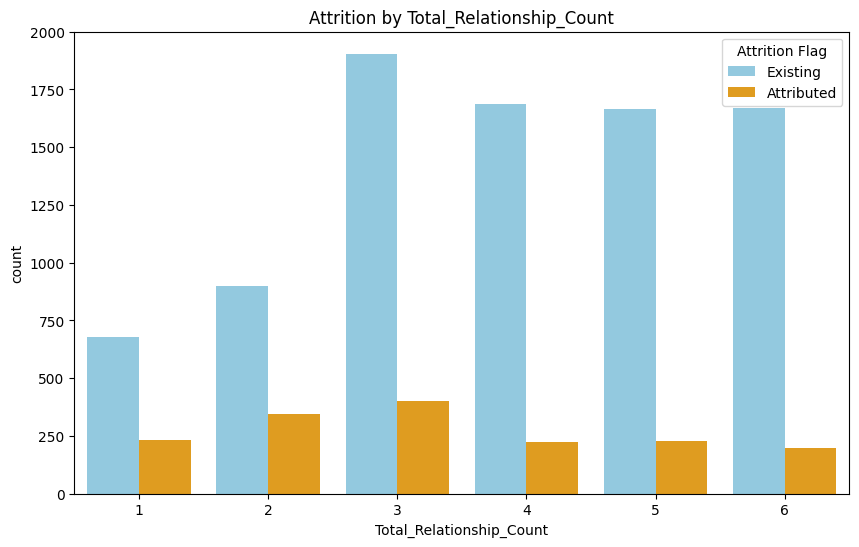

In [76]:
plt.figure(figsize=(10, 6))
ct_plot = sns.countplot(data=bank, x='Total_Relationship_Count', hue='Attrition_Flag', palette={0:'skyblue', 1:'orange'})
ct_plot.set_title('Attrition by Total_Relationship_Count')
plt.legend(title='Attrition Flag', labels=['Existing', 'Attributed'])
plt.show()

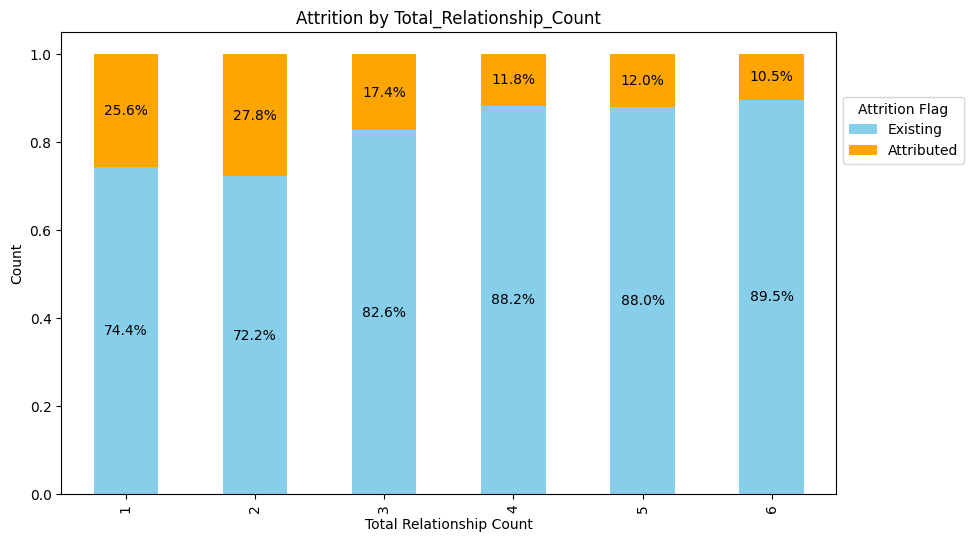

In [85]:
stack_data = bank.groupby(['Total_Relationship_Count', 'Attrition_Flag']).size().unstack()
percent = stack_data.div(stack_data.sum(axis=1), axis=0)

ax = percent.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], figsize=(10, 6))
plt.title('Attrition by Total_Relationship_Count')
plt.xlabel('Total Relationship Count')
plt.ylabel('Count')
plt.legend(title='Attrition Flag', labels=['Existing', 'Attributed'], loc='lower left', bbox_to_anchor=(1.0, 0.7))

for p in ax.patches:
  width = p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  label_text =f'{height*100:.1f}%'
  ax.text(x+width/2, y+height/2, label_text, ha='center', va='center')

plt.show()

히트맵 보니까 Total_Trans랑 음의 상관관계가 있으니까 한번 보자

<ipython-input-75-8aa94887f30d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Relationship_Count', y='Total_Trans_Ct', data=agg_data, ax=axes[0], palette='viridis')
<ipython-input-75-8aa94887f30d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Relationship_Count', y='Total_Trans_Amt', data=agg_data, ax=axes[1], palette='viridis')


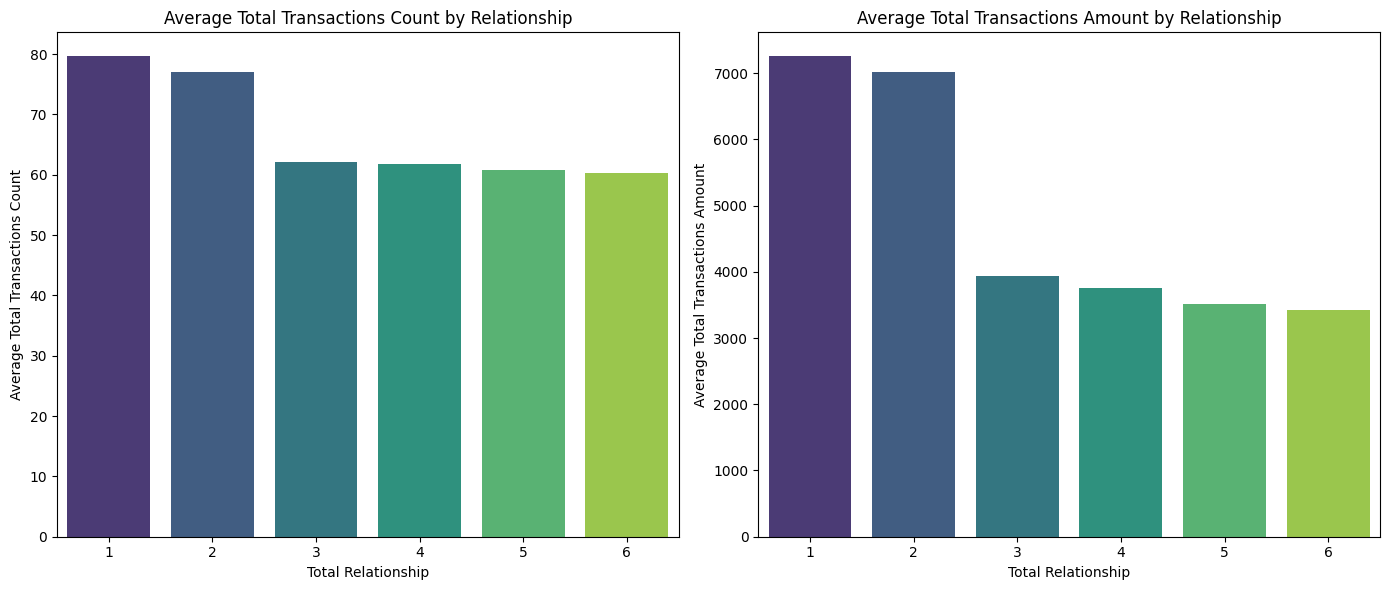

In [75]:
columns = ['Total_Relationship_Count', 'Total_Trans_Ct', 'Total_Trans_Amt']
agg_data = bank[columns].groupby('Total_Relationship_Count').mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Total_Trans_Ct
sns.barplot(x='Total_Relationship_Count', y='Total_Trans_Ct', data=agg_data, ax=axes[0], palette='viridis')
axes[0].set_title('Average Total Transactions Count by Relationship')
axes[0].set_xlabel('Total Relationship')
axes[0].set_ylabel('Average Total Transactions Count')

# Total_Trans_Amt
sns.barplot(x='Total_Relationship_Count', y='Total_Trans_Amt', data=agg_data, ax=axes[1], palette='viridis')
axes[1].set_title('Average Total Transactions Amount by Relationship')
axes[1].set_xlabel('Total Relationship')
axes[1].set_ylabel('Average Total Transactions Amount')

plt.tight_layout()
plt.show()